# Stock Market Analysis

The project addresses the following questions:

  - Basic stock information.
  - What was the daily change of the stock price?
  - What was the daily return of the stock on average?
  - What are the moving averages of the stocks?
  - Look at different correlations of different stocks: for example, correlations of closing prices and their daily returns.
  - Determination of how much value one can put at risk by investing into a particular stock.
  - Prediction of future stock behavior based on previous stock behavior.
  
For demonstration purposes, stocks of 4 semiconductor companies: **Intel**, **Qualcomm**, **Micron Technology** and **Texas Instruments** are used in this project demonstration.

In [1]:
# Standard imports
import pandas as pd
import numpy as np
from pandas import Series,DataFrame


# Visulaization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

# For time stamps
from datetime import datetime

# Reading stock data from internet
from pandas.io.data import DataReader

# For division
from __future__ import division

We will use Yahoo finance and pandas to get data for some semiconductor stocks.

In [2]:
# The stocks we use in the project
tech_list = ['INTC','QCOM','MU','TXN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)

#For loop for grabing yahoo finance data and setting as a dataframe

for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock,'yahoo',start,end)

Let's get a feel for the data.

In [3]:
# Summary Stats for Intel stock
INTC.describe()

,Open,High,Low,Close,Volume,Adj Close
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251.000000
mean,33.308088,33.651554,33.016653,33.365458,3.154088e+07,32.838890
std,2.373172,2.365750,2.329072,2.326492,1.563015e+07,2.345617
min,26.330000,26.740000,26.180000,26.710000,1.101750e+07,25.985030
25%,31.765000,32.410000,31.485000,31.920000,2.280295e+07,31.488915
50%,33.670000,33.990000,33.260000,33.700000,2.782010e+07,33.218830
75%,34.700000,34.925000,34.440000,34.770000,3.329815e+07,34.100230
max,37.680000,37.900000,37.520000,37.670000,1.358932e+08,37.133210


In [4]:
# General Information
INTC.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2014-05-27 to 2015-05-22
Data columns (total 6 columns):
Open         251 non-null float64
High         251 non-null float64
Low          251 non-null float64
Close        251 non-null float64
Volume       251 non-null int64
Adj Close    251 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


Let's plot the volume and closing price of the stock.

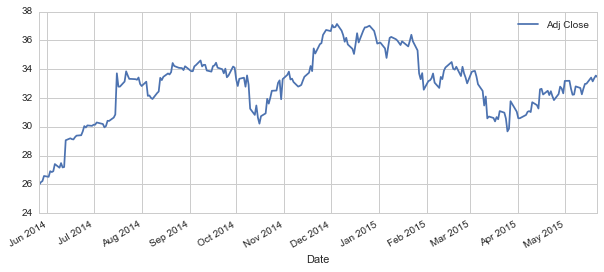

In [8]:
# Evolution of the closing price of stock within last year
INTC['Adj Close'].plot(legend=True,figsize=(10,4))

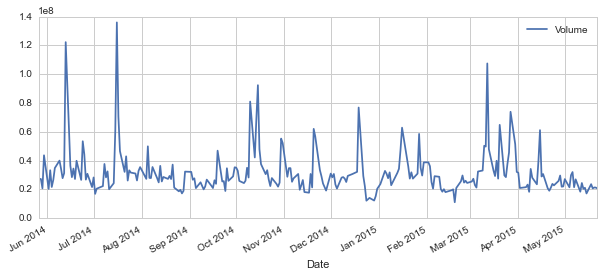

In [9]:
# The total volume of stock being traded each day over the past year
INTC['Volume'].plot(legend=True,figsize=(10,4))

Let's calculate and plot the moving averages for the stock.

In [10]:
# Pandas has a built-in rolling mean calculator

# Let's go ahead and plot out several moving averages
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    INTC[column_name]=pd.rolling_mean(INTC['Adj Close'],ma)

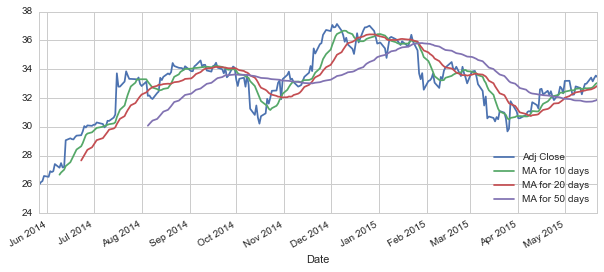

In [11]:
INTC[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

Let's conduct analysis of the risk of the stock. For the analysis, we will need to get info on the daily changes of the stock.

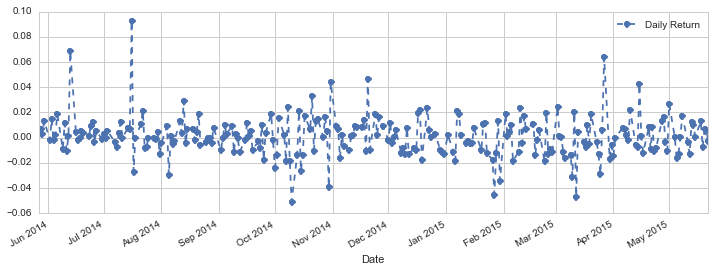

In [13]:
# We'll use the built-in pct_change method to find the percent change for each day
INTC['Daily Return'] = INTC['Adj Close'].pct_change()
# Then we'll plot the daily return percentage
INTC['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o')

Let's look at the average daily return using a histogram and kde plot.

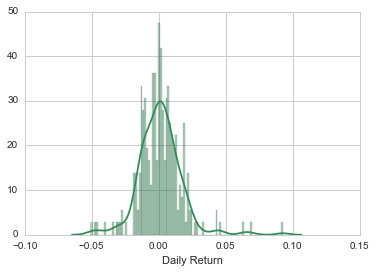

In [24]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(INTC['Daily Return'].dropna(),bins=100,color='seagreen')

# Could have also done:
#INTC['Daily Return'].hist()

Let's analyze returns of all stocks we are interested in.

In [19]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = DataReader(['INTC','QCOM','MU','TXN'],'yahoo',start,end)['Adj Close']

In [20]:
# Let's get a feel fot the data we have just grabbed
closing_df.head()

,INTC,MU,QCOM,TXN
Date,,,,
2014-05-27,25.98503,28.06,78.67860,45.17174
2014-05-28,26.15041,28.61,78.44392,45.27895
2014-05-29,26.22824,28.58,78.41459,45.47386
2014-05-30,26.57847,28.59,78.66883,45.78573
2014-06-02,26.52010,28.66,79.11118,45.79548


Let's get the daily returns for all the stocks like we did for Intel stock.

In [21]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()

In [22]:
tech_rets.head()

,INTC,MU,QCOM,TXN
Date,,,,
2014-05-27,NaN,NaN,NaN,NaN
2014-05-28,0.006364,0.019601,-0.002983,0.002373
2014-05-29,0.002976,-0.001049,-0.000374,0.004305
2014-05-30,0.013353,0.000350,0.003242,0.006858
2014-06-02,-0.002196,0.002448,0.005623,0.000213


Let's compare the daily percentage return of two stocks to see how they are correlated. 

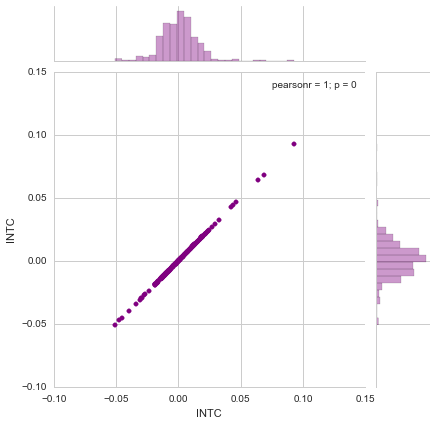

In [25]:
# Comparing Intel to itself should show a perfectly linear relationship
sns.jointplot('INTC','INTC',tech_rets,kind='scatter',color='purple')

Let's compare Texas Instruments and Micron Technology the same way. 

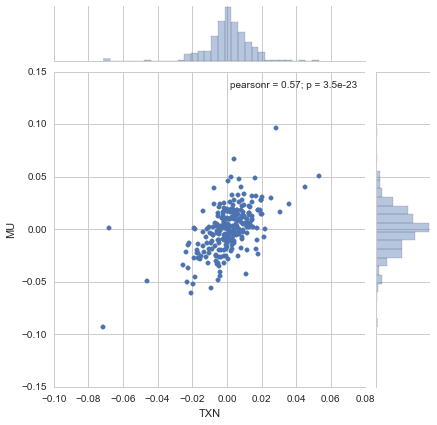

In [67]:
# We'll use joinplot to compare the daily returns of Texas Instruments and Micron Technology
sns.jointplot('TXN','MU',tech_rets,kind='scatter')

Let's run this comparison for every possible combination of stocks in our technology stock ticker list.

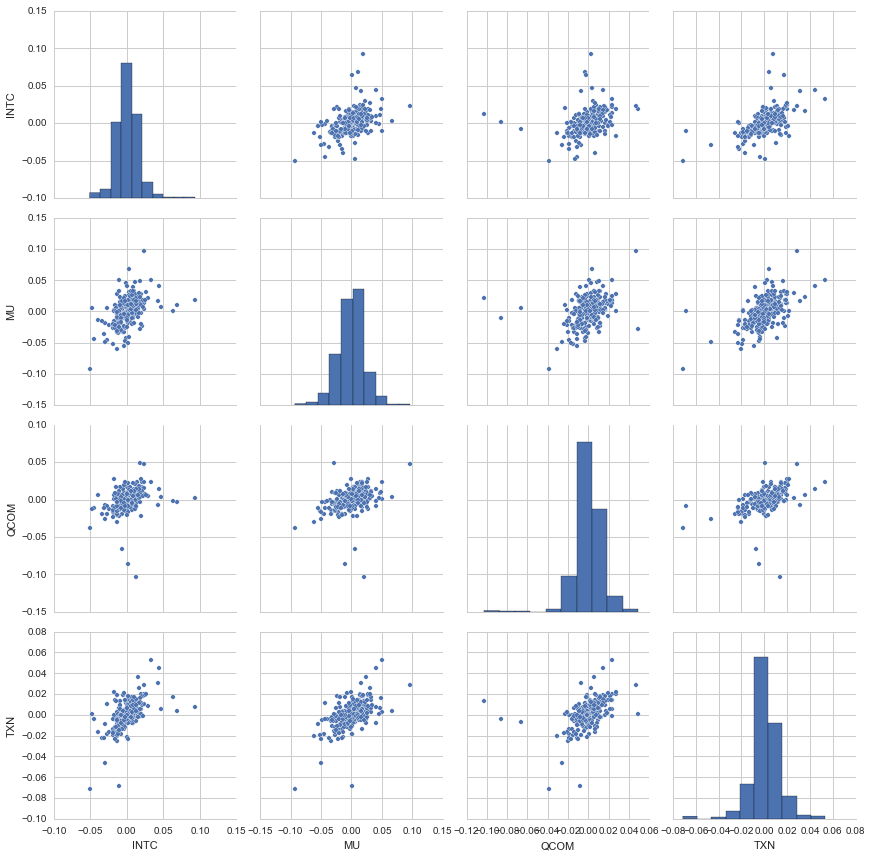

In [27]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis of all the comparisons
sns.pairplot(tech_rets.dropna())

As we can see from above all the relationships between daily stocks are presented on the screen. We can quickly notice the correlations between Intel and Texas Instruments, Micron Technology and Texas Instruments.

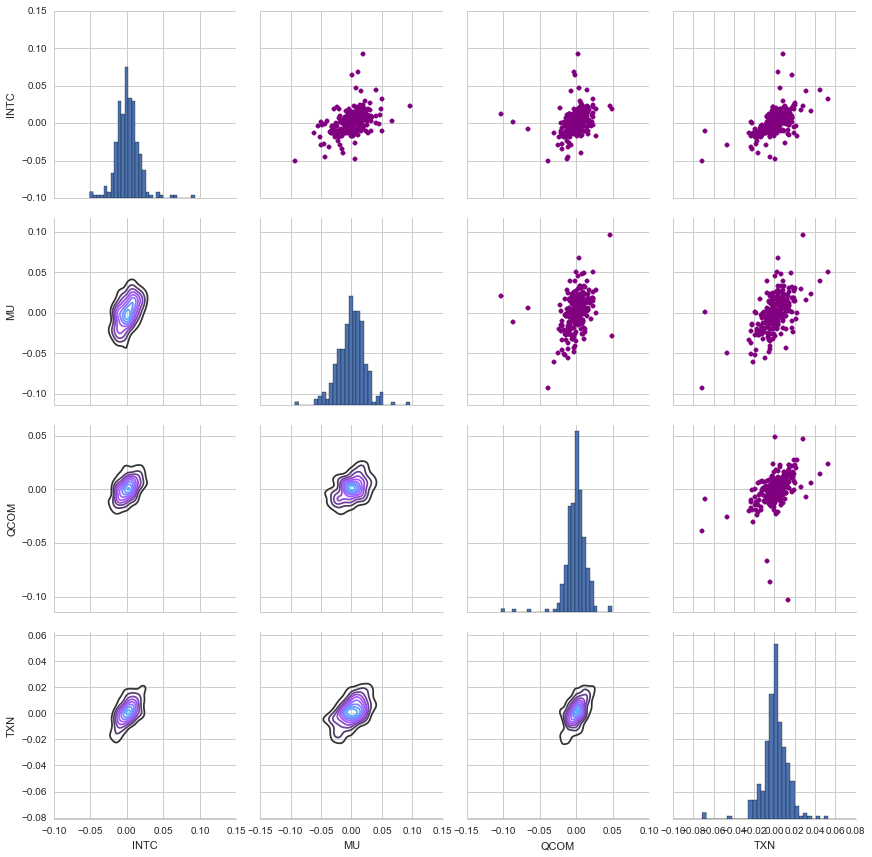

In [28]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# We define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Let's analyze the correlation of the closing prices in the same way.

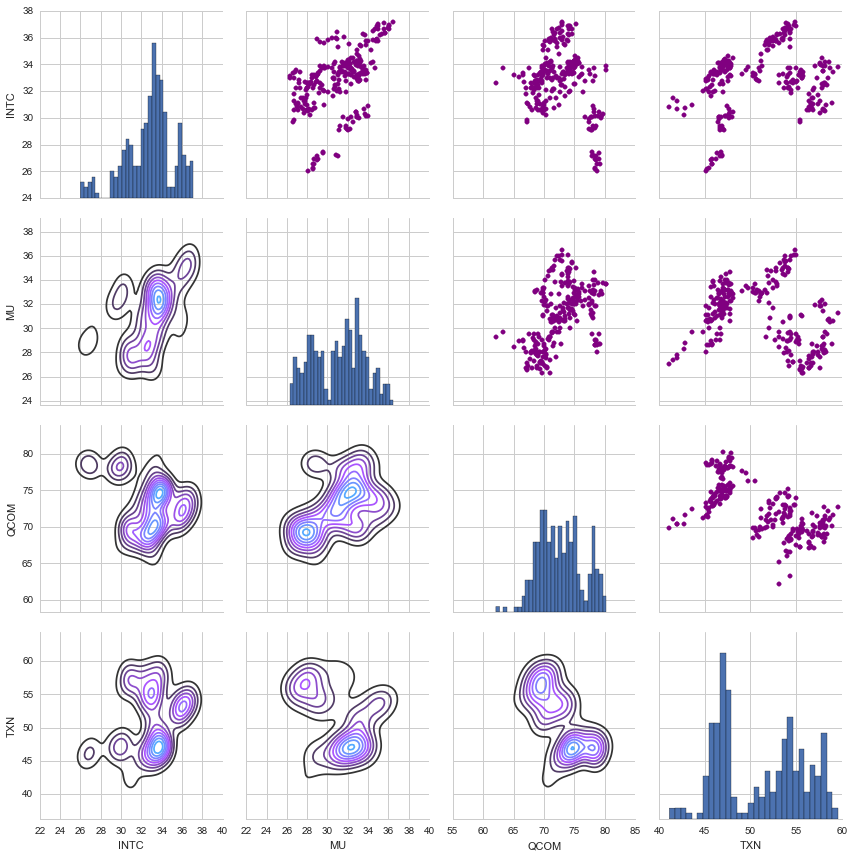

In [29]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# We define the diagonal as a series of histogram plots of the closing price
returns_fig.map_diag(plt.hist,bins=30)

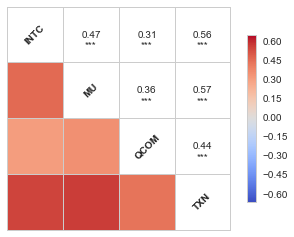

In [30]:
# Let's go ahead and use seabron for a quick correlation plot for the daily returns
sns.corrplot(tech_rets.dropna(),annot=True)

Just as we suspected we in PairPlot we see the strongest correlation of daily stocks returns between Intel and Texas Instruments, Micron Technology and Texas Instruments. It's wothy to note, that all the semiconductor companies are positively correlated.

One of the most basic ways to quantify risk is by comparing the expected return with the standard deviation of the daily returns.

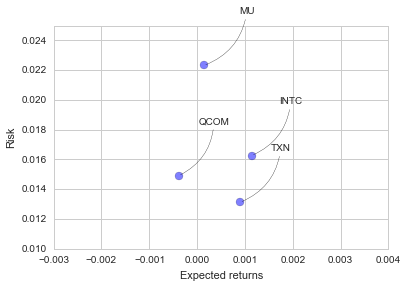

In [31]:
# Let's define a new DataFrame as a cleaned version of the original tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi*20

plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)

# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)
plt.ylim([0.01,0.025])
plt.xlim([-0.003,0.004])

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

By looking at the plot above, one would want to have a stock with the higher expected return and lower risk. Looks like Intel and Texas Instruments are here the best stocks to pick from.

In [58]:
rets.std()

INTC    0.016265
MU      0.022318
QCOM    0.014913
TXN     0.013123
dtype: float64

Let's define a value at risk parameter for the stocks we are interested in. Let's first use the "bootstrap" method.

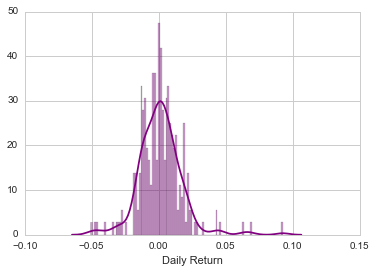

In [32]:
sns.distplot(INTC['Daily Return'].dropna(),bins=100,color='purple')

Let's get the risk value for the stock by using quantile.

In [34]:
# The 0.05 empirical quantile of daily returns
rets['INTC'].quantile(0.05)

-0.018874859964757667

The 0.05 empirical value of daily returns is at -0.019. That means that with 95% confidence, our worst daily loss will not exceed 1.9% for Intel stock.

Let's estimate the value at risk using Monte Carlo method.

In [35]:
# Set up our time horizon
days = 365

# Now our delta
dt = 1/days

# Now let's grab our mu (drift) from the expected return data we got for INTC
mu = rets.mean()['INTC']

# Now let's grab the volatility of the stock from the std() of the average return
sigma = rets.std()['INTC']

In [36]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    # Schock and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in xrange(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [37]:
INTC.head()

,Open,High,Low,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,
2014-05-27,26.33,26.74,26.18,26.71,27271900,25.98503,NaN,NaN,NaN,NaN
2014-05-28,26.70,26.94,26.66,26.88,27150100,26.15041,NaN,NaN,NaN,0.006364
2014-05-29,26.91,26.96,26.72,26.96,20638900,26.22824,NaN,NaN,NaN,0.002976
2014-05-30,26.94,27.32,26.93,27.32,43641000,26.57847,NaN,NaN,NaN,0.013353
2014-06-02,27.31,27.35,27.12,27.26,20264900,26.52010,NaN,NaN,NaN,-0.002196


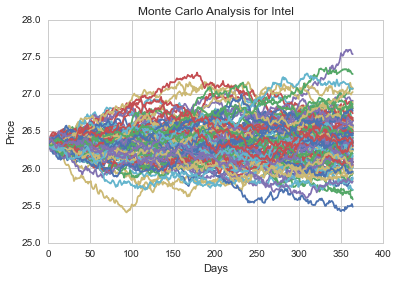

In [38]:
# Get start price from INTC.head()
start_price = 26.33

for run in xrange(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Intel')

In [39]:
# Set a large number of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in xrange(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];

Let's use quantile to define risk for this stock.

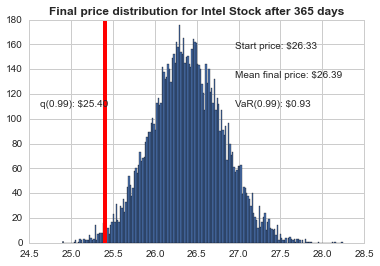

In [40]:
# Now we'll define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)
    
# Now let's plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Intel Stock after %s days" % days, weight='bold');

Our start price was 26.33 and the mean final price was 26.39. We see that this is a pretty stable stock. The value at risk for each Intel stock is going to be 0.93 99 percent of the time, which comes from our Monte Carlo Simulation.